<a href="https://colab.research.google.com/github/kjdatamc/Data110/blob/main/KHatton_week6_data110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Your Environment and
1. Install any necessary packages

In [1]:
!pip install rpy2
!pip install joypy

2. Import the required libraries:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from joypy import joyplot

Part 2: Load and Explore the Dataset

1. Load the Palmer Penguins dataset:

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"


In [3]:
# Load dataset
penguins=pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

# Display dataset info
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
# Review first 5 rows to understand data contents
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


2. The dataset contains missing values. Handle them by removing rows with NaN values:

In [5]:
# Create dataframe removing NaN values
df_penguins = penguins.dropna()

# Display new dataframe info
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# Part 2: Data Visualization

Task 1: Boxplot - Analyzing Body Mass by Species
Create a boxplot to compare the distribution of penguin body mass across different species:

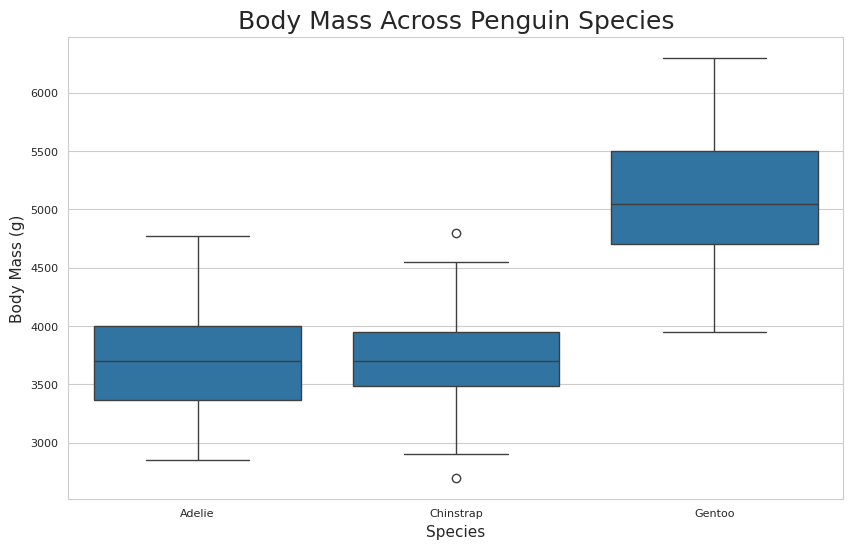

In [6]:
# set style
sns.set_style('whitegrid')

# set figure size
plt.figure(figsize=(10, 6))

# create boxplot
sns.boxplot(x='species', y='body_mass_g', data=df_penguins)

# set title + axis labels, format ticks
plt.title('Body Mass Across Penguin Species', fontsize=18)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Body Mass (g)', fontsize=11)
plt.grid(axis='y', visible=True, zorder=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Interpretation: Based on the boxplot, answer the following:

1. Which species has the largest median body mass?
2. Which species has the widest range in body mass?
3. Are there any outliers? If so, which species have them?

**Responses**
1. Largest median body mass: **Gentoo**
2. Widest range in body mass: **Gentoo**
3. Outliers: **Chinstrap** species has upper and lower outliers

Task 2: Violin Plot - Flipper Length Distribution by Species
Create a violin plot to analyze the distribution of flipper length across species:

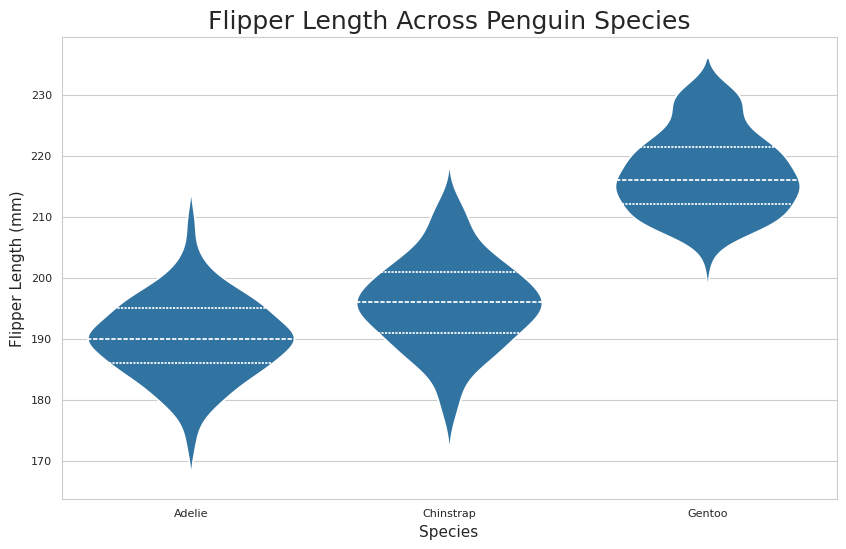

In [7]:
# set figure size
plt.figure(figsize=(10, 6))

# create violin plot
sns.violinplot(x='species', y='flipper_length_mm', data=df_penguins, inner='quartile', linecolor='white', zorder=2)

# set title + axis labels, format ticks
plt.title('Flipper Length Across Penguin Species', fontsize=18)
plt.xlabel('Species', fontsize=11)
plt.ylabel('Flipper Length (mm)', fontsize=11)
plt.grid(axis='y', visible=True, zorder=0)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

Interpretation: Answer the following:

1. Which species has the most symmetrical distribution?
2. Which species has the widest spread of flipper lengths?
3. How do the quartiles (white lines in the plot) compare for each species?

**Responses**
1. Most symmetrical distribution: **Chinstrap** and **Adelie** are both very symmetrical; it's difficult to determine which is more symmetrical visually. the 2nd and 3rd quartiles for **Chinstrap** are more symmetrical, while the 1st and 4th quartiles for **Adelie** are more symmetrical.
2. Widest range in flipper length: **Adelie**
3. Quartiles comparison: **The quartiles of the Adelie and Chinstrap are similar, with normal distributions and much lower medians compared to the the Gentoo. The median for the Adelie is around the first quartile for the Chinstrap, while the median for the Gentoo is near the upper limit of the Chinstrap flipper lengths. The Gentoo flipper lengths skew positive. There's also an almost bimodal distribution, with the mode around 215 and a second significant concentration just shy of 230.**

**Task 3**: Ridgeline Plot - Distribution of Bill Length by Island
Use a ridgeline plot to visualize the distribution of bill length across islands:

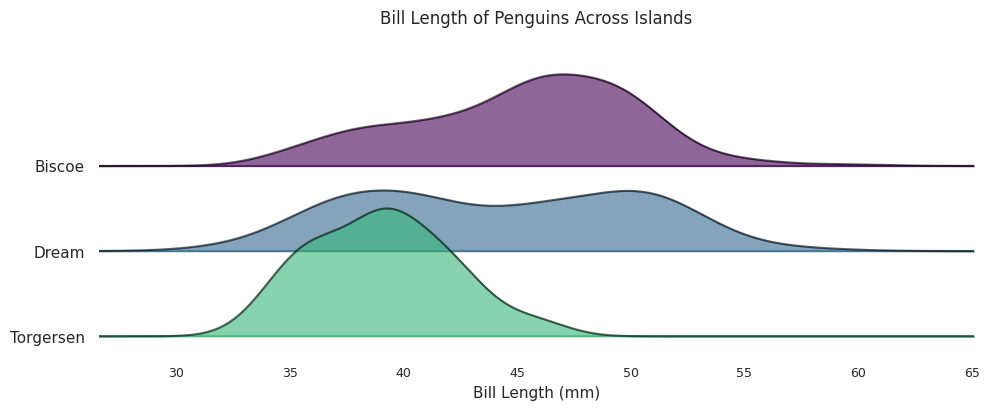

In [8]:
# select relevant columns
data_islands=df_penguins[['bill_length_mm', 'island']]

# Create the Ridgeline plot
fig, axes = joyplot(data_islands,
    by='island',
    column='bill_length_mm',
    figsize=(10, 4),
    colormap=plt.cm.viridis,
    ylabelsize=11,
    xlabelsize=9,
    title="Bill Length of Penguins Across Islands",
    alpha=0.6
)

plt.xlabel('Bill Length (mm)', fontsize=11)

plt.show()

Interpretation: Answer the following:
1. Which island has the smallest range of bill lengths?
2. Which island has the most uniform distribution?
3. What differences do you notice between the islands in terms of bill length?

**Responses**
1. Smallest range of bill lengths: **Torgersen**
2. Most uniform distribution: **Dream**
3. Differences noticed between islands: **Biscoe has the highest median bill length, while Torgersen has the lowest. Dream has a bimodal distribution, with modal peaks near the median of Torgersen and several mm above the median for Biscoe. Since Torgersen has such a concentrated lower bill length and comparatively normal distribution, it appears that at least one species present on the other islands doesn't live on Torgersen.**

upload your completed notebook (.ipynb) to Google Colab or GitHub.
Submit the GitHub/Colab link in MS Teams under the assignment post.